<a href="https://colab.research.google.com/github/manavavi/ML/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Information on features:-**

Marketing Campaign for Banking Products.ipynb_
Information on features:-

The attributes can be divided into differenct categories:

The attributes ID does not provide much information for Loan so we can neglact it for model prediction.

    1.Binary Class:- There are 5 attributes belong to this class
        Personal Loan :- This is our target variable. It state that does the customer accept the loan offered in past.
        Security Account:- Does coutomer has security account with bank?
        CD Account:- Does the customer have a certificate of deposit (CD) account with the bank?
        Online:- Does the customer use internet banking facilities?
        Credit Card:- Does the customer use a credit card issued by UniversalBank?

    2.Interval variable:-
        Age
        Experiance
        Income
        CCAvg
        Mortages

    3.Ordinal Categorical variable:-
        Family
        Education

    4.The Nominal Variable is:-
        ID
        Zip Coad

Since we observe that the minimum value of Experiance is in negative but we know that the experiance can't be negative so we have to clear the data.

There are 52 row in which the value of experiance is nagative. So we clean all these 52 row of data set.
Influence of income and Education on personal loan







**Importing all  libraries**





In [108]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline                                 # Figures inline and set visualization style


UsageError: unrecognized arguments: # Figures inline and set visualization style


**File upload and importing datasets**

In [109]:

from google.colab import files 
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [110]:
dataset = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

***Checking datatype, Statistical summary, Shape, Nullvalues etc & Data cleaning ***

In [111]:
dataset.shape


(5000, 14)

In [112]:
 pd.read_csv('Bank_Personal_Loan_Modelling.csv')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [113]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [114]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [115]:
dataset.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [116]:
dataset['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [117]:
dataset['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [118]:
dataset['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [119]:
dataset['ZIP Code'].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

In [120]:
dataset['Family'].unique()

array([4, 3, 1, 2])

In [121]:
dataset['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [122]:
dataset['Education'].unique()

array([1, 2, 3])

In [123]:
dataset['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [124]:
dataset['Securities Account'].unique()

array([1, 0])

In [125]:
dataset['CD Account'].unique()

array([0, 1])

In [126]:
dataset['Online'].unique()

array([0, 1])

In [127]:
dataset['CreditCard'].unique()

array([0, 1])

In [128]:
dataset['Personal Loan'].unique()

array([0, 1])

**There are 52 row in which the value of experiance is nagative. So we clean all these 52 row of data set.**

In [129]:
posExp = dataset.loc[dataset["Experience"]>0]
negExp = dataset.Experience <0
mylist = dataset.loc[negExp]['ID'].tolist()

In [130]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [131]:
median =np.median(dataset["Experience"]>0)
print(median)

1.0


In [132]:
for id in mylist:
    dataset.loc[dataset.loc[np.where(dataset["ID"]==id)].index,'Experience']=median

In [133]:
dataset[dataset["Experience"]<0]["Experience"].count()

0

In [134]:
data = dataset.drop(['ID'], axis=1)

In [135]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.130000,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.422626,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [137]:
data.isnull().any()

Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [138]:
X = data[['Experience','ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account','Online','CreditCard']].values
y = data['Income'].values

In [139]:
corelation = data.corr()
corelation

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994098,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994098,1.000000,-0.046878,-0.028790,-0.051922,-0.049891,0.013769,-0.010972,-0.008167,-0.001080,0.009831,0.013960,0.008913
Income,-0.055269,-0.046878,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028790,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051922,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049891,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013769,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010972,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008167,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001080,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [140]:
data["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [141]:
data["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [142]:
data["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [143]:
data["Securities Account"].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [144]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [145]:
data["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [146]:
data["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

 **EDA**

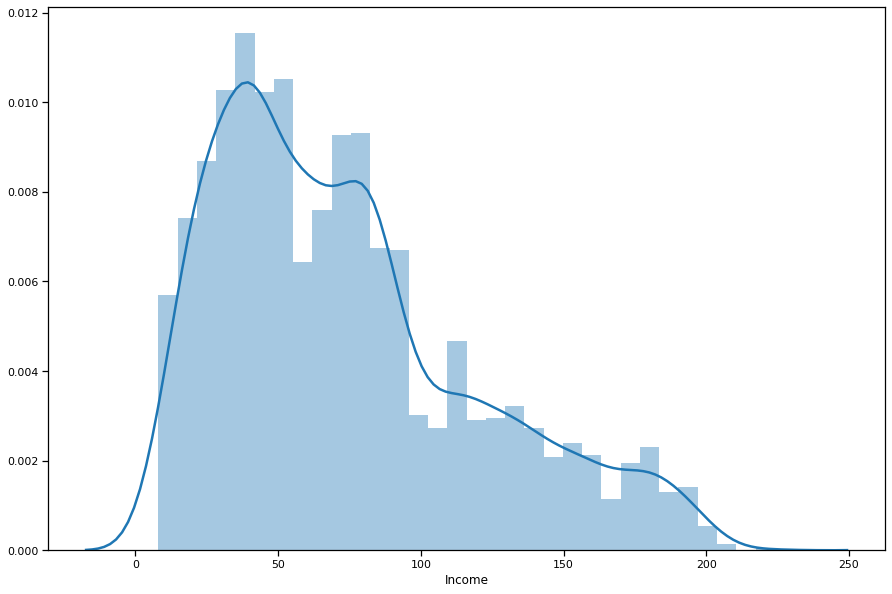

In [147]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Income'])

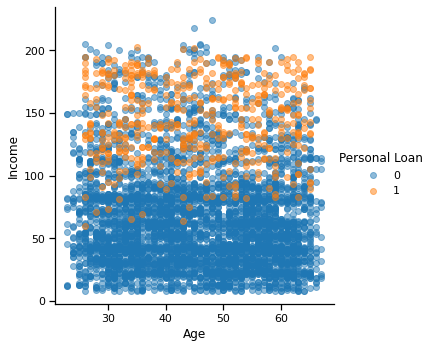

In [148]:
sns.lmplot(x='Age', y='Income', hue='Personal Loan', data=data, fit_reg=False, scatter_kws={'alpha':0.5});

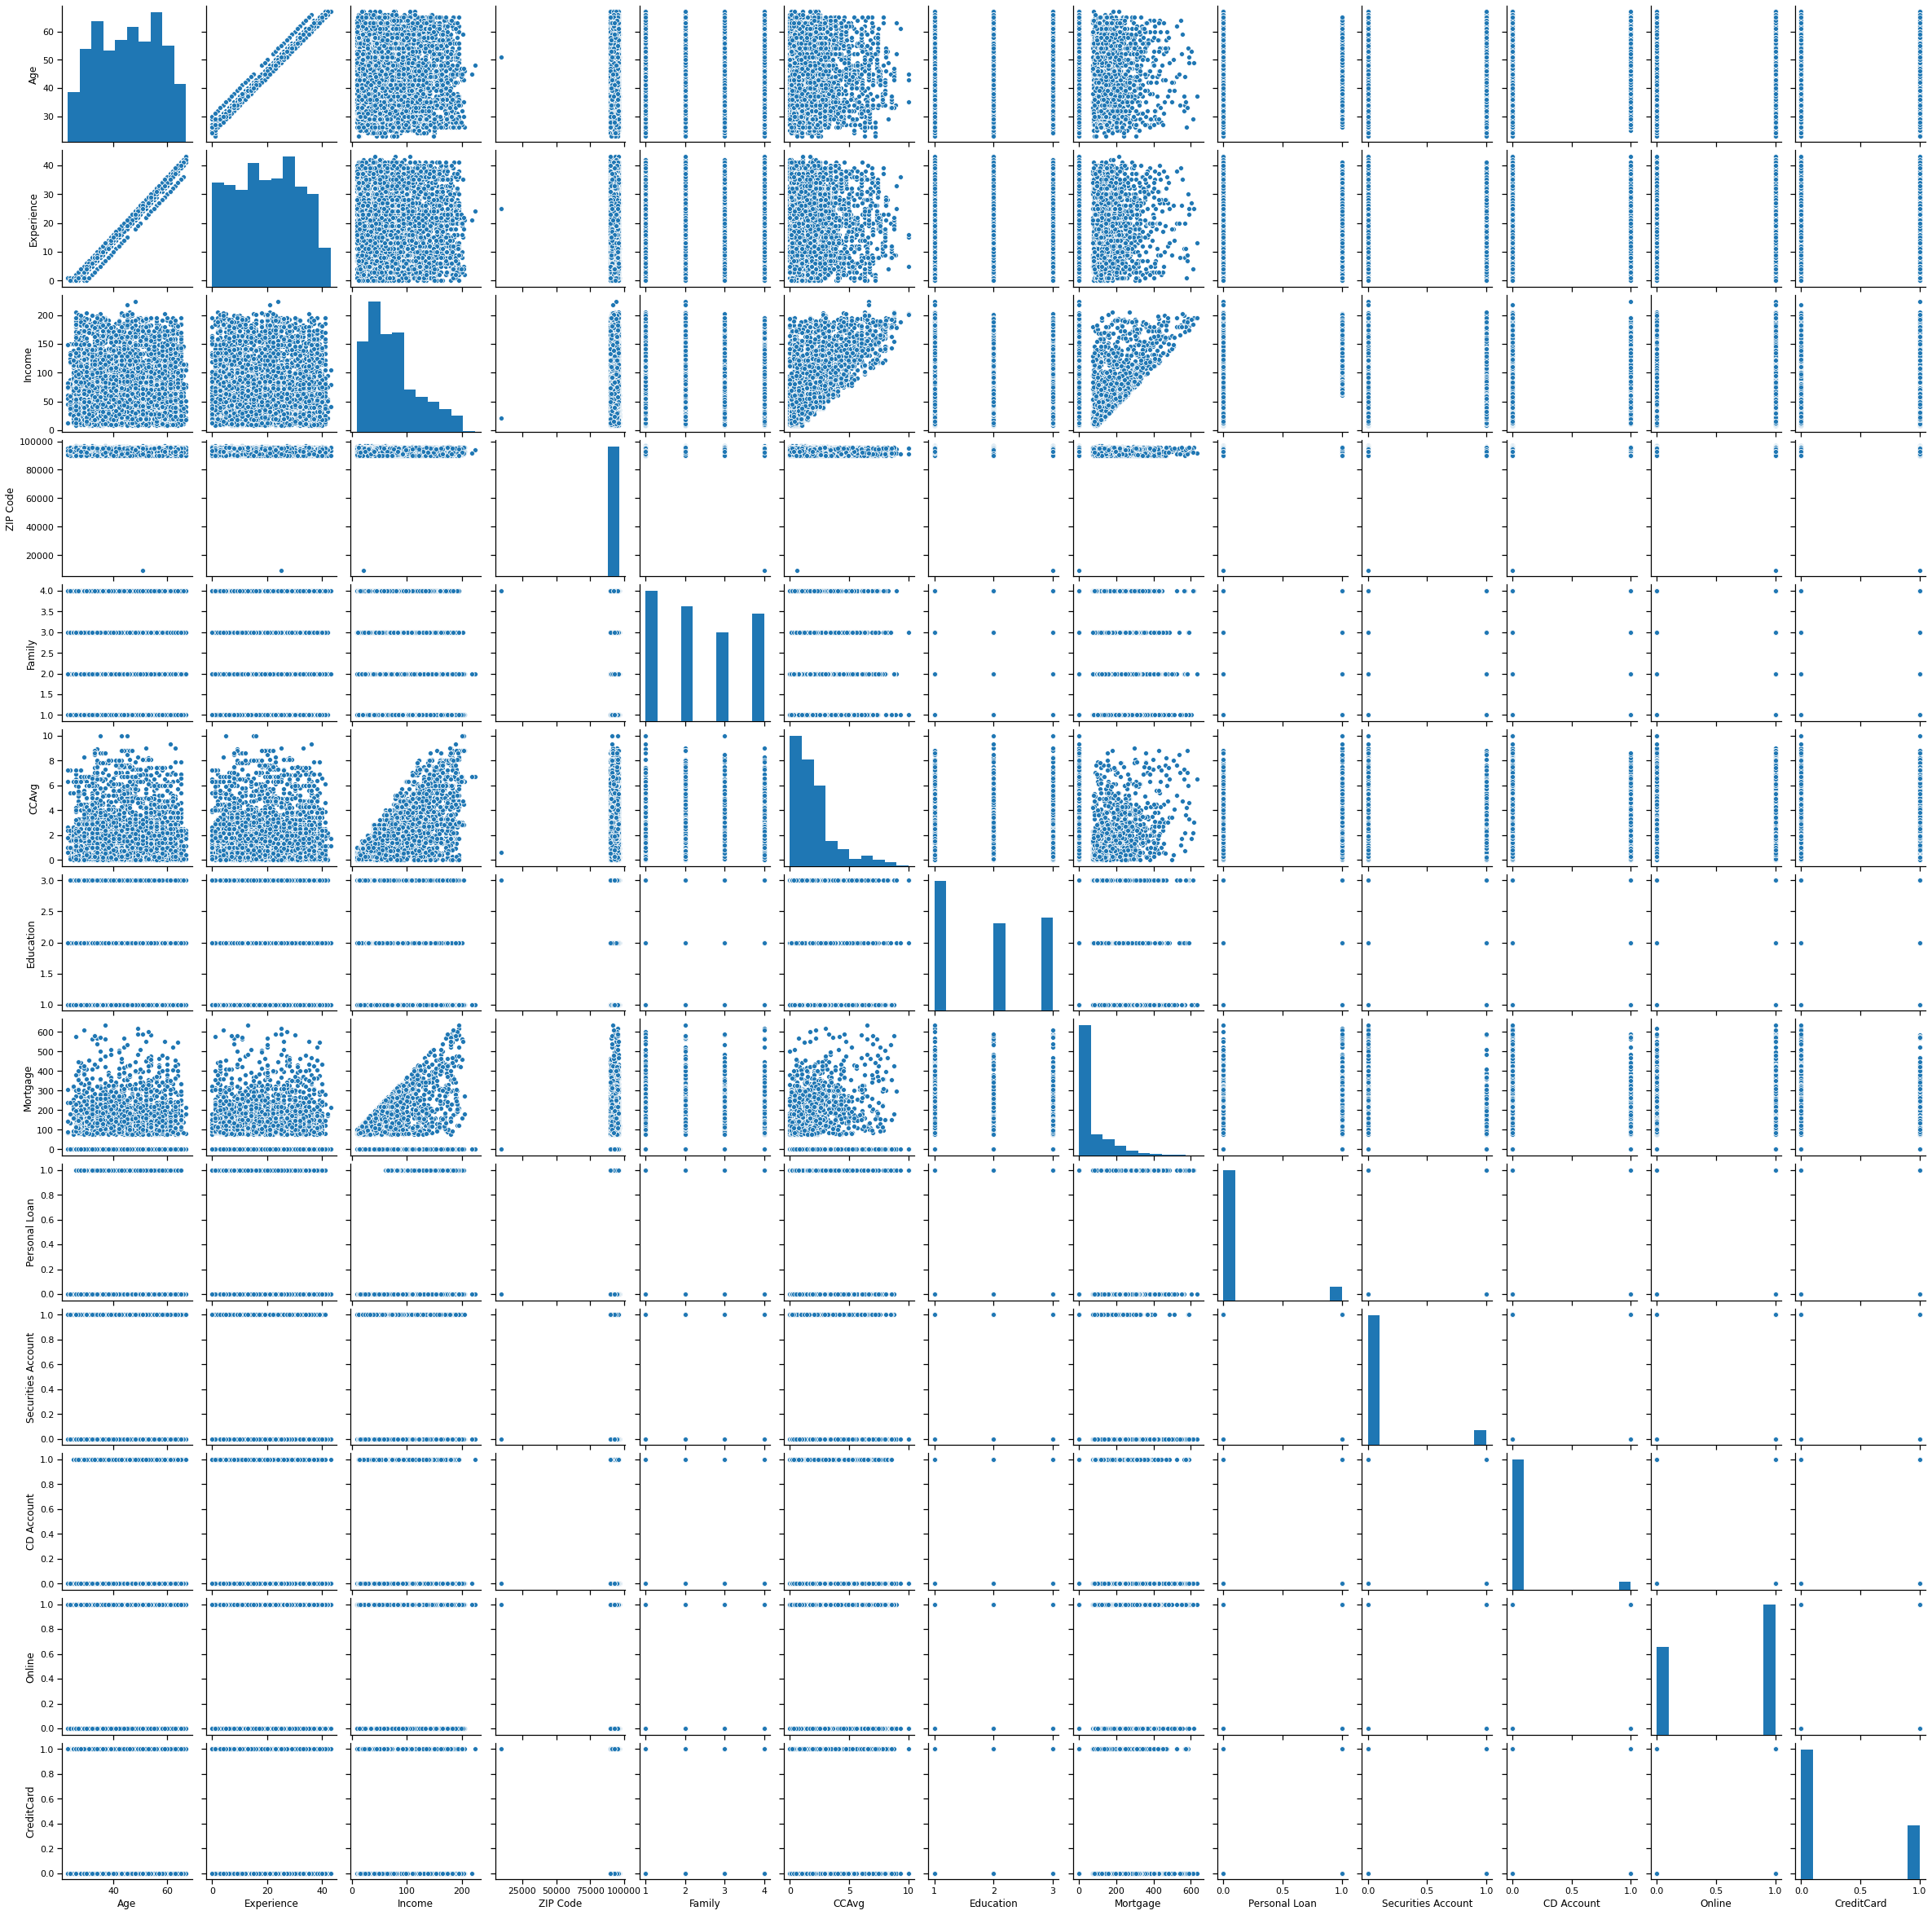

In [149]:
sns.pairplot(data)

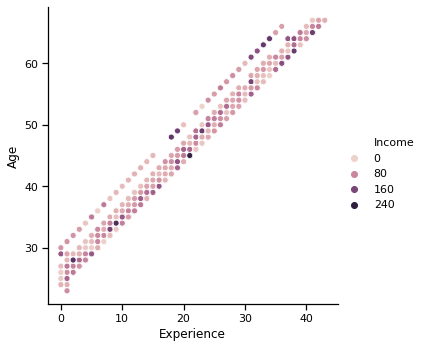

In [150]:
sns.relplot(x='Experience',y='Age', hue='Income', data=data) 

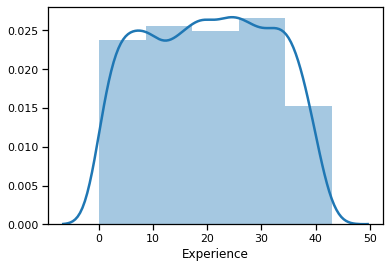

In [151]:
sns.distplot(data['Experience'],bins=5)

**Influence of income and Education on personal loan**

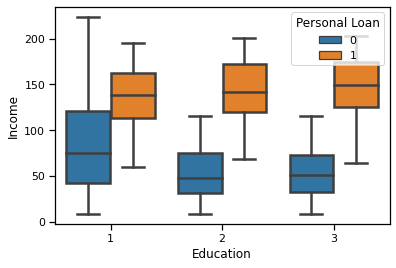

In [152]:
sns.boxplot(y="Income",x="Education",hue="Personal Loan", data=data)

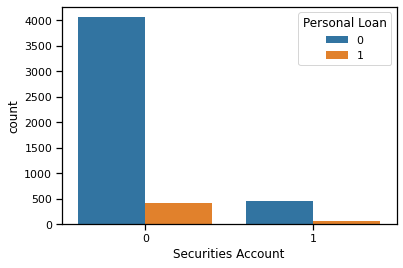

In [159]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

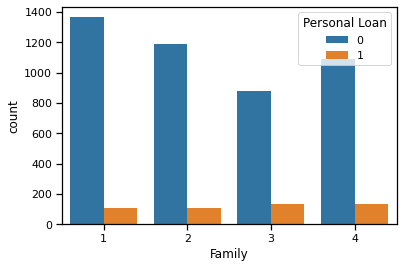

In [154]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

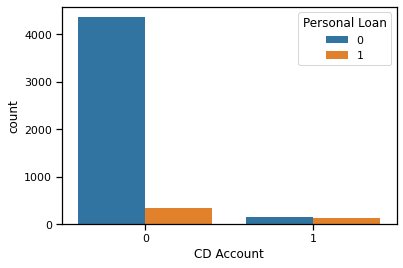

In [155]:
sns.countplot(x="CD Account", data=data, hue="Personal Loan")

Observation:- Majority of customer does not have "CD Account" and does not have loan. It also seem that almost all customer who have CD Account can also take loan.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


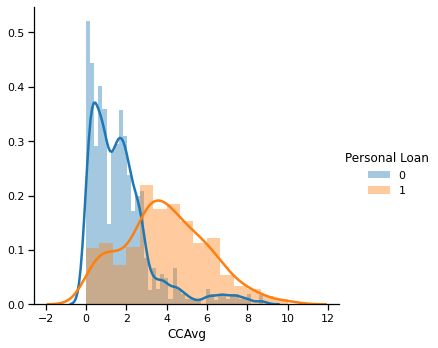

In [156]:
sns.FacetGrid(data , hue="Personal Loan", size=5) \
   .map(sns.distplot, "CCAvg") \
   .add_legend()
plt.show()

**Correlation by HeatMap**

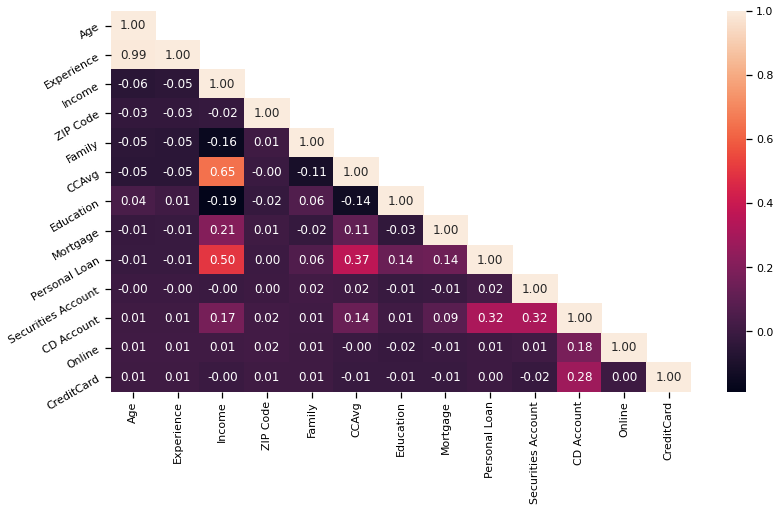

In [157]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation:-

1) Income and CCAvg is moderately correlated.

2) Age and Experience is highly correlated


**Applying the Model**

Split data into train and test

In [161]:
# Train test split
# We will drop the Age, ID columns from training as well as test dataset
X = data.iloc[:,2:-1]
y = data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7 )

In [162]:
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(X_train,y_train)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(X_test)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred) 
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 91.53333333333333 %
The f1-score of the model is 38.048780487804876 %
The confusion matrix for logistic regression is: 
 [[1334   28]
 [  99   39]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.58      0.28      0.38       138

    accuracy                           0.92      1500
   macro avg       0.76      0.63      0.67      1500
weighted avg       0.90      0.92      0.90      1500



Observations: One can see that although accuracy is good, f1-score is low in this case i.e., precision and recall values are not upto the mark especially recall value is low (.28) for class 1

Recall value of 28% means, out of all the customers who would actually buy the loan, only 28% were correctly predicted to be positive (would buy the personal loan) thus bank is missing on 72% of potential customers resulting in recampaigning cost

58% of precision value means out of all positively predicted customers (who would buy the personal loan) only 58% were correctly predicted.
